# PROBLEM STATEMENT

in recent years, attention has increasingly been paid to human resources (HR), since worker quality and skills represent a growth factor and a real competitive advantage for companies. After proving its mettle in sales and marketing, artificial intelligence is also becoming central to employee-related decisions within HR management. Organizational growth largely depends on staff retention. Losing employees frequently impacts the morale of the organization and hiring new employees is more expensive than retaining existing ones. 

You are working as a data scientist with HR Department of a large insurance company focused on sales team attrition. Insurance sales teams help insurance companies generate new business by contacting potential customers and selling one or more types of insurance. The department generally sees high attrition and thus staffing becomes a crucial aspect. 

To aid staffing, you are provided with the monthly information for a segment of employees for 2016 and 2017 and tasked to predict whether a current employee will be leaving the organization in the upcoming two quarters (01 Jan 2018 - 01 July 2018) or not, given:


1. Demographics of the employee (city, age, gender etc.)
2. Tenure information (joining date, Last Date)
3. Historical data regarding the performance of the employee (Quarterly rating, Monthly business acquired, designation, salary)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.display import display_html

from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# DATA PREPROCESSING

In [2]:
train = pd.read_csv(r"C:\Users\Sasidharan\Desktop\Jobathon\train_MpHjUjU.csv")
t = pd.read_csv(r"C:\Users\Sasidharan\Desktop\Jobathon\test_hXY9mYw.csv")

In [3]:
train = pd.DataFrame(train)
t = pd.DataFrame(t)

In [4]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [5]:
t.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [6]:
train.shape, t.shape

((19104, 13), (741, 1))

In [7]:
train.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [8]:
train.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [9]:
train["Emp_ID"].nunique()


2381

# There are 2381 unique employee ids. Information is available for each individual employee on a monthly reporting basis.

In [10]:
train[train.Emp_ID == 1]

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2


In [11]:
t["Emp_ID"].nunique()

741

Upon closer inspection, we find that there are multiple entries corresponding to each Employee_ID based on their review data

In [12]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])


Categorical Features in Train Set: 6
Numerical Features in Train Set: 7


In [13]:
print(categorical.columns)
print(numerical.columns)

Index(['MMM-YY', 'Gender', 'City', 'Education_Level', 'Dateofjoining',
       'LastWorkingDate'],
      dtype='object')
Index(['Emp_ID', 'Age', 'Salary', 'Joining Designation', 'Designation',
       'Total Business Value', 'Quarterly Rating'],
      dtype='object')


In [14]:
# Converting emplyee_id into object format

train["Emp_ID"] = train["Emp_ID"].astype(object)

In [15]:
train.loc[train["LastWorkingDate"].isna(),"Left_company"] = 0
train.loc[train["LastWorkingDate"].notna(),"Left_company"] = 1

In [16]:
train[["MMM-YY","Dateofjoining","LastWorkingDate"]] = train[["MMM-YY","Dateofjoining","LastWorkingDate"]].apply(pd.to_datetime)

In [17]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Left_company
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0.0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0.0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0.0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0.0


In [18]:
train.groupby("Emp_ID")["LastWorkingDate"].count().value_counts()

1    1616
0     765
Name: LastWorkingDate, dtype: int64

# FEATURE CREATION 

Transforming some of the features such as dates and creating additional features based on the ones already available;

In [19]:
def features(x):
    x["LastWorkingDate"] = x["LastWorkingDate"].iloc[-1]
    
    # How long has the employee been at the company in months
    
    x["Experience"] = ((x["MMM-YY"] - x["Dateofjoining"].iloc[0]).dt.days) / 30
    x.loc[x["Experience"] < 0, "Experience"] = 0
    
    # Salary raise from starting salary 
    
    x["Salaryraise"] = (x["Salary"] - x["Salary"].iloc[0]) / x["Salary"].iloc[0]
    
    # No of promotions during employment
    
    x["Levels of Promotion"] = x["Designation"] - x["Joining Designation"]
    
   # Rating difference from previous quarter
    
    x["Quarterly rating diff"] = x["Quarterly Rating"] - x["Quarterly Rating"].shift(1)
    
    # Previous Quarter Rating
    
    x["Previous quarterly rating"] = x["Quarterly Rating"].shift(1)
    
    # Total cumulative value employee has generated at the time of monthly reporting
    
    x["Accumulated Business Value"] = x["Total Business Value"].cumsum()
    
    # Total cumulative salary of the employee
    
    x["Accumulated Salary"] = x["Salary"].cumsum()
    
    # No of days between an employee quit date and a monthly reporting date;
    
    x["Days"] = x["LastWorkingDate"] - x["MMM-YY"]
    
    # Quarterly employee value (how much money does an employee bring into the company for every unit salary paid to him/her)
    
    x["QE_val"] = x["Total Business Value"] / x["Salary"]
    
    # Accumulated Employee val
    
    x["Accumulated QE_val"] = x["Accumulated Business Value"] / x["Accumulated Salary"]
    

    return x
    
a = train.groupby("Emp_ID").apply(features)

# EXPLORATORY ANALYSIS

In [20]:
a.head(15)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,...,Experience,Salaryraise,Levels of Promotion,Quarterly rating diff,Previous quarterly rating,Accumulated Business Value,Accumulated Salary,Days,QE_val,Accumulated QE_val
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,...,0.266667,0.0,0,NaN,NaN,2381060,57387,70 days,41.491279,41.491279
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,...,1.300000,0.0,0,0.0,2.0,1715580,114774,39 days,-11.596355,14.947462
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,...,2.266667,0.0,0,0.0,2.0,1715580,172161,10 days,0.000000,9.964975
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,0.000000,0.0,0,NaN,NaN,0,67016,NaT,0.000000,0.000000
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,...,0.833333,0.0,0,0.0,1.0,0,134032,NaT,0.000000,0.000000
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,...,0.000000,0.0,0,NaN,NaN,0,65603,147 days,0.000000,0.000000
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,...,0.833333,0.0,0,0.0,1.0,0,131206,116 days,0.000000,0.000000
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,...,1.866667,0.0,0,0.0,1.0,0,196809,85 days,0.000000,0.000000
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,...,2.800000,0.0,0,0.0,1.0,350000,262412,57 days,5.335122,1.333780
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,...,3.833333,0.0,0,0.0,1.0,350000,328015,26 days,0.000000,1.067024


In [21]:
print(a.groupby("Gender").Salary.mean())
print("")
print(a.groupby("Gender").Experience.mean())
print("")
print(a.groupby("Gender").QE_val.mean())
print("")

print(a.groupby("Education_Level").Salary.mean())
print("")
print(a.groupby("Education_Level").QE_val.mean())
print("")
print(a.groupby("Education_Level").Experience.mean())


Gender
Female    66133.798275
Male      65304.851662
Name: Salary, dtype: float64

Gender
Female    20.061642
Male      19.493647
Name: Experience, dtype: float64

Gender
Female    9.006381
Male      8.910408
Name: QE_val, dtype: float64

Education_Level
Bachelor    66362.592366
College     60644.080670
Master      69561.404299
Name: Salary, dtype: float64

Education_Level
Bachelor    9.271748
College     9.677216
Master      7.923132
Name: QE_val, dtype: float64

Education_Level
Bachelor    21.111242
College     19.570399
Master      18.385306
Name: Experience, dtype: float64


# MODEL 

In [22]:
m = a[~ a["Emp_ID"].isin(t["Emp_ID"])]

# Data for building the model ;  Rest is the data we have to predict upon; 

In [23]:
m = m.drop(["MMM-YY","LastWorkingDate","Dateofjoining"], axis = 1)

Creating the target label based upon whether an employee left within 180 days (6 months) of a monthy reporting date;
1 : Yes
0 : No

In [24]:
m["Left_180"] = (m["Days"].dt.days <= 180)*1
m["Left_180"].fillna(0,inplace=True)

m.isnull().sum()

In [25]:
m.dtypes

Emp_ID                                 object
Age                                     int64
Gender                                 object
City                                   object
Education_Level                        object
Salary                                  int64
Joining Designation                     int64
Designation                             int64
Total Business Value                    int64
Quarterly Rating                        int64
Left_company                          float64
Experience                            float64
Salaryraise                           float64
Levels of Promotion                     int64
Quarterly rating diff                 float64
Previous quarterly rating             float64
Accumulated Business Value              int64
Accumulated Salary                      int64
Days                          timedelta64[ns]
QE_val                                float64
Accumulated QE_val                    float64
Left_180                          

In [26]:
m["Days"] = m["Days"].dt.days
m["Quarterly rating diff"].fillna(0,inplace=True)
m["Previous quarterly rating"].fillna(0,inplace=True)

In [27]:
y = m.pop("Left_180").astype("category")
x = m

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier


In [29]:
x[["Gender","City","Education_Level"]] = x[["Gender","City","Education_Level"]].astype("category")

Employee "City" information has high cardinality, which would create an issue when we want to integer code the categories. To address this, we group cities based on the average experience of an employee from that particular city, and reduce them to smaller categories (G1,G2,G3).

In [30]:
avg_exp = pd.DataFrame(x.groupby("City").Experience.agg("mean"))

In [31]:
print(avg_exp.index[avg_exp.Experience <= 10])
print(avg_exp.index[avg_exp.Experience > 15])
print(avg_exp.index[(avg_exp.Experience > 10) & (avg_exp.Experience <=15)])

CategoricalIndex(['C15', 'C24', 'C8', 'C9'], categories=['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', ...], ordered=False, name='City', dtype='category')
CategoricalIndex(['C1', 'C10', 'C13', 'C18', 'C19', 'C21', 'C22', 'C26', 'C27',
                  'C6', 'C7'],
                 categories=['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', ...], ordered=False, name='City', dtype='category')
CategoricalIndex(['C11', 'C12', 'C14', 'C16', 'C17', 'C2', 'C20', 'C23', 'C25',
                  'C28', 'C29', 'C3', 'C4', 'C5'],
                 categories=['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', ...], ordered=False, name='City', dtype='category')


In [32]:
x = x.replace(["C15","C24","C8","C9"], "G1")
x = x.replace(['C1', 'C10', 'C13', 'C18', 'C19', 'C21', 'C22', 'C26', 'C27',
                  'C6', 'C7'], "G3")
x = x.replace(['C11', 'C12', 'C14', 'C16', 'C17', 'C2', 'C20', 'C23', 'C25',
                  'C28', 'C29', 'C3', 'C4', 'C5'], "G2")

In [33]:
x["City"].unique()

['G2', 'G3', 'G1']
Categories (3, object): ['G2', 'G3', 'G1']

In [34]:
x = x.drop(["Emp_ID","Days","Left_company"], axis = 1)

In [35]:
# Integer coding the categorical variables

x = pd.get_dummies(x, columns = ["Gender", "City","Education_Level"])

In [36]:
fold = StratifiedKFold(5, True, 15)

rf_train_score = 0
rf_test_score = 0

dt_train_score = 0
dt_test_score = 0

lr_train_score = 0
lr_test_score = 0



for tr_index, te_index in fold.split(x,y): 
    x_train, x_test = x.iloc[tr_index], x.iloc[te_index] 
    y_train, y_test = y.iloc[tr_index], y.iloc[te_index]

    rf = RandomForestClassifier()
    dt = DecisionTreeClassifier()
    lr = LogisticRegression(solver = 'liblinear')
    cb = CatBoostClassifier()

    rf.fit(x_train,y_train)
    rf_train_score += accuracy_score(y_train,rf.predict(x_train))
    rf_test_score += accuracy_score(y_test,rf.predict(x_test))
    

    dt.fit(x_train,y_train)
    dt_train_score += accuracy_score(y_train,dt.predict(x_train))
    dt_test_score += accuracy_score(y_test,dt.predict(x_test))
    
    lr.fit(x_train,y_train)
    lr_train_score += accuracy_score(y_train,lr.predict(x_train))
    lr_test_score += accuracy_score(y_test,lr.predict(x_test))
    


print("Accuracy of Decision Tree Classifier on training set:", dt_train_score / 5)
print("Accuracy of Decision Tree Classifier on testing set:", dt_test_score / 5)

print(" ")

print("Accuracy of Random Forrest Model on training set", rf_train_score / 5)
print("Accuracy of Random Forrest Model on testing set:", rf_test_score / 5)

print(" ")

print("Accuracy of Logistic Regression Model on training set:", lr_train_score/5)
print("Accuracy of Logistic Regression Model on testing set:", lr_test_score/5)



Accuracy of Decision Tree Classifier on training set: 1.0
Accuracy of Decision Tree Classifier on testing set: 0.7881320440392301
 
Accuracy of Random Forrest Model on training set 0.9933673312324572
Accuracy of Random Forrest Model on testing set: 0.8045836026816598
 
Accuracy of Logistic Regression Model on training set: 0.7211390757674063
Accuracy of Logistic Regression Model on testing set: 0.7213751053315663


In [37]:
print(metrics.classification_report(y_test, rf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.68      0.62      0.65       620
          1       0.85      0.88      0.86      1482

avg / total       0.80      0.80      0.80      2102



In [38]:
print(metrics.classification_report(y_test, dt.predict(x_test)))

             precision    recall  f1-score   support

          0       0.63      0.62      0.63       620
          1       0.84      0.85      0.85      1482

avg / total       0.78      0.78      0.78      2102



In [39]:
print(metrics.classification_report(y_test, lr.predict(x_test)))

             precision    recall  f1-score   support

          0       0.54      0.18      0.27       620
          1       0.73      0.93      0.82      1482

avg / total       0.67      0.71      0.66      2102



In [40]:
importance = rf.feature_importances_
feature_names = x_train.columns

In [41]:
feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": importance})

In [42]:
feature_importance

,Feature,Importance
0,Age,0.080604
1,Salary,0.104906
2,Joining Designation,0.018770
3,Designation,0.023169
4,Total Business Value,0.082132
5,Quarterly Rating,0.072713
6,Experience,0.103695
7,Salaryraise,0.000079
8,Levels of Promotion,0.029650
9,Quarterly rating diff,0.012118


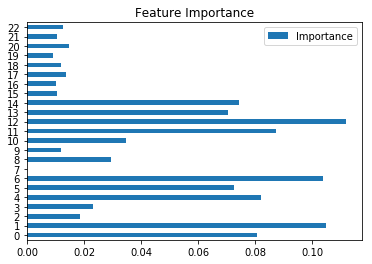

In [43]:
feature_importance.plot(kind = "barh", title = "Feature Importance")
plt.show()

Most important details to determine whether an employee will leave or not:
 
1. Salary
2. Business Value
3. Experience
4. Employee Value

# Random Forest Model gives us the best results of all the models. The accuracy can still be improved upon by tuning the hyperparameters. We can use this model to predict if an employee will leave the company within 6 months of a monthly report date. This can help us pinpoint when an employee is likely to leave the company (Quarter 1 or 2 and so on)